# Titanic Problem

### Importing the important libraries

In [36]:
import numpy as np                 #linear algebra library       
import pandas as pd                # data processing library
import matplotlib.pyplot as plt    # data visualization library for plotting different types of graph 
import seaborn as sns              # another python visualiztion library

# --------------------------------------------------------------------------------------------------------------

## loading datasets

In [37]:
#importing the training dataset
train = pd.read_csv("train.csv")

In [38]:
test = pd.read_csv('test.csv')
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# --------------------------------------------------------------------------------------------------------------

### let's privew the dataset

In [39]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
# information about the dataset 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [41]:
#statistical Description of the dataset 
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


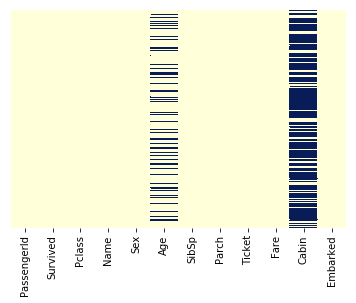

In [42]:
#lets first plot a heatmap to visualize the missing data
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

We can observe that our data sets have missing values out of 891 entries age has only 714 values but the number of missing data is small so we can impute the missing data without creating any major bias in the dataset,but the number of missing data in cabin is large so we need to remove the column or give values like 1 or 0 to the values in the columns.

# --------------------------------------------------------------------------------------------------------------

## Exploring the Dataset

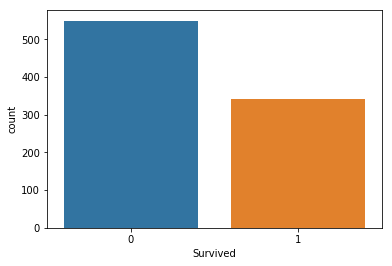

In [43]:
# plotting to see the number of people survived v/s the number of people who died
sns.countplot(x='Survived', data= train)

In [44]:
#finding the Average percntage of total number of Passengers Survived
print(train['Survived'].value_counts())
print('Percentage of passengers Survived : ',(342/(342+549))*100,'%')

0    549
1    342
Name: Survived, dtype: int64
Percentage of passengers Survived :  38.38383838383838 %


# The Survived column consists of value 1 or 0 , 1 for people who Survived and 0 for who didn't . Percentage of Passengers Survived is 38.38%

# --------------------------------------------------------------------------------------------------------------

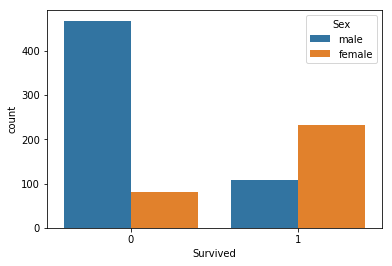

In [45]:
sns.countplot(x='Survived', hue='Sex', data= train)

In [46]:
# Sex wise visualization 
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


# Sex wise survival chances
# We can see that female have a great chance of surviving as compared to male passengers Female have 74.2% chances of surviving whereas male has just 18.89% chances of being saved 

We can infer from the model that the number of women died is far less than the number of men who died,and the number of women who survived is even higher

# --------------------------------------------------------------------------------------------------------------

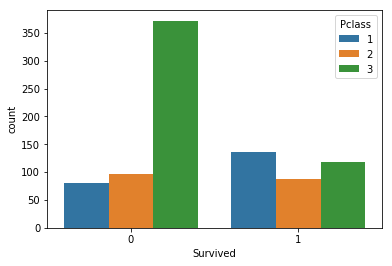

In [47]:
sns.countplot(x='Survived', hue='Pclass', data= train)

## Class wise chances of surviving in the data frame

In [48]:
# grouping Class data with whether with they survived or not
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


## We can infer that the chances of surviving is 62.96 % in Class 1, 47.2826 % in Class 2, 24.23% in Class 3

# --------------------------------------------------------------------------------------------------------------

# looking for survival chance on basis of number of parents/childrens

C:\Users\YASH VATSA\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\YASH VATSA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


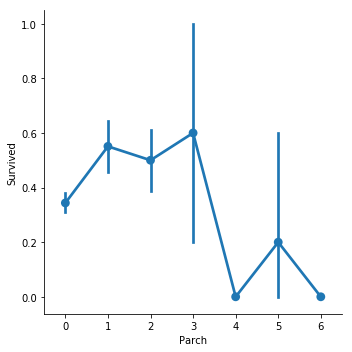

In [49]:
sns.factorplot('Parch','Survived', data= train)    #factor plot 

In [50]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# passengers having a Parch Value of 3 that is the number of childrens/parents have the highest possibility of Survival about 60%

# --------------------------------------------------------------------------------------------------------------

C:\Users\YASH VATSA\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


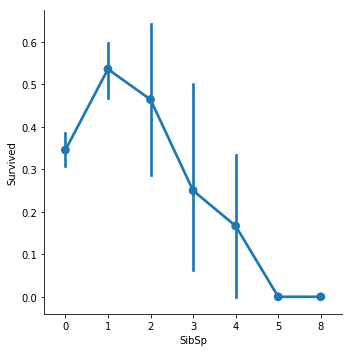

In [51]:
sns.factorplot('SibSp','Survived', data= train)

In [52]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


# Passengers having a 1 sibling or Spouse have the highest possibility of survival with survival percentage of 53.58 %

# --------------------------------------------------------------------------------------------------------------

### Age Distribution of People with different Age Groups

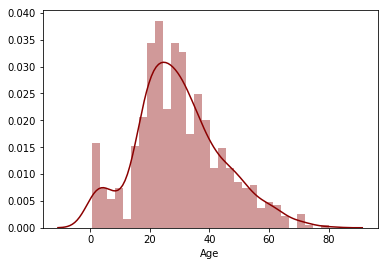

In [53]:
sns.distplot(train['Age'].dropna(),color='darkred',bins=30)

## looking for survival rate for children(age <= 15 ) and elder people (age >= 60)

Percenatge of Elder Survived 26.923076923076923 %


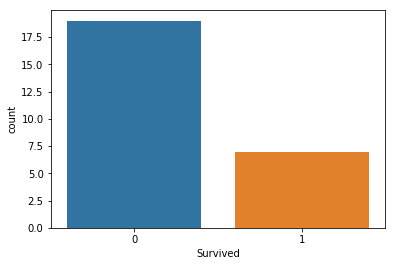

In [54]:
Elder = train.loc[(train['Age'] >= 60)]
Total_Elder = train.loc[(train['Age'] >= 60)].shape[0]     #finding total number of Elder in the ship
Elder_Survived = train.loc[(train['Age'] >= 60) & (train['Survived'] == 1), :].shape[0]   #finding total number of Elders Who survived
print('Percenatge of Elder Survived',(Elder_Survived/(Total_Elder))*100,"%")
sns.countplot(x='Survived', data= Elder)   #counplot of elder passengers who survived


# Survival Percentage of an elder person is 26.92 % which is far less than the average percenatge of survival of a general passenger 

Percenatge of Children Survived 59.036144578313255 %


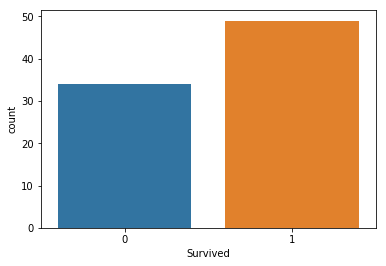

In [55]:
Child = train.loc[(train['Age'] <= 15)]
Total_Child = train.loc[(train['Age'] <= 15)].shape[0]     #finding total number of child in the ship
Child_Survived = train.loc[(train['Age'] <= 15) & (train['Survived'] == 1), :].shape[0]   #finding total number of children Who survived
print('Percenatge of Children Survived',(Child_Survived/(Total_Child))*100,"%")
sns.countplot(x='Survived', data= Child)   #countplot of child passengers who survived 


Percenatge of Children Survived belonging to Upper Class 83.33333333333334 %


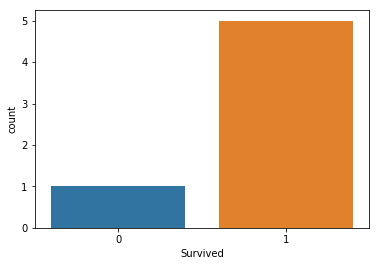

In [56]:
Child_Class1 = train.loc[(train['Age'] <= 15) & (train['Pclass'] == 1)]
Total_Child_Class1 = train.loc[(train['Age'] <= 15) & (train['Pclass'] == 1)].shape[0]     #finding total number of child in the ship
Child_Survived_Class1 = train.loc[(train['Age'] <= 15) & (train['Survived'] == 1) & (train['Pclass'] == 1), :].shape[0]   #finding total number of children Who survived
print('Percenatge of Children Survived belonging to Upper Class',(Child_Survived_Class1/(Total_Child_Class1))*100,"%")
sns.countplot(x='Survived', data= Child_Class1)   # countplot of children belonging to class1

# Survival Percentage of a Child is 59.03% which is relatively high as compared to the survival chances of a passenger and if we look at the childrens belonging to upper class the percntage goes above to 83.33%

# --------------------------------------------------------------------------------------------------------------

In [57]:
Total_Child_Class1 = train.loc[(train['Age'] <= 15) & (train['Pclass'] == 1)].shape[0]     #finding total number of child in the ship
Child_Survived_Class1 = train.loc[(train['Age'] <= 15) & (train['Survived'] == 1) & (train['Pclass'] == 1), :].shape[0]   #finding total number of children Who survived
print('Percenatge of Children Survived belonging to Upper Class',(Child_Survived_Class1/(Total_Child_Class1))*100,"%")

Percenatge of Children Survived belonging to Upper Class 83.33333333333334 %


# --------------------------------------------------------------------------------------------------------------

,Embarked,Survived
2,S,0.336957
1,Q,0.389610
0,C,0.553571


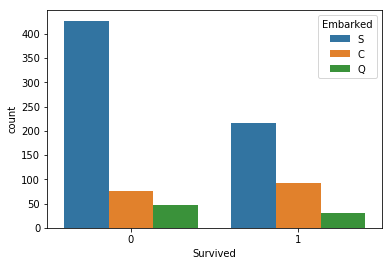

In [58]:
sns.countplot(x='Survived', hue='Embarked', data= train)
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Embarked', ascending=False)

# Survival percentage of the people from Cherbourg is highest with a percentage of 55.35% whereas Sothampton has 33.69% and Queenstown has 38.96 % survivability rate 

# --------------------------------------------------------------------------------------------------------------

# Creating New Features and modifying nan values

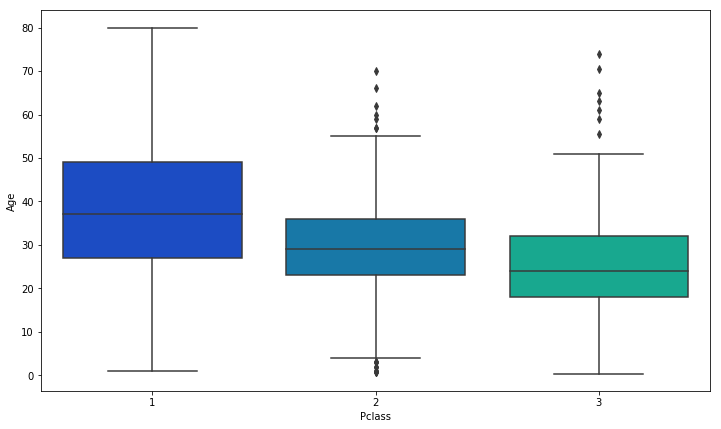

In [59]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter') # visualizing age distribution across different classes

In [60]:
#finding the mean ages so that we can insert mean value of age class wise wherever the age is missing 
train[['Pclass','Age']].groupby(['Pclass']).mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


 Looking for survival percentage for childrens(people under age 14) and elderly people(people age of 60)

# Removing Nan Values from Age column

In [61]:
#removing NaN values from age column

def remove_Age_NaN(x):
   Age = x[0]                      
   Pclass = x[1]                  
   if pd.isnull(Age):
       if Pclass == 1:           #looking for class 1
           return 38
       elif Pclass == 2:         #looking for class 2
           return 30
       else:
           return 25
   else:
       return Age

train['Age'] = train[['Age', 'Pclass']].apply(remove_Age_NaN, axis = 1)

In [62]:
 # removing nan values from cabin data type
def impute_cabin(x):
   Cabin = x[0]
   if type(Cabin) == str:             #if the cabin typr is of string it mean cabin type is defined
       return 1
   else:
       return 0                       #other wiese it is of NaN type

train['Cabin'] = train[['Cabin']].apply(impute_cabin, axis = 1)

## Managing data frame for predictions

In [63]:
train.drop(['PassengerId', 'Name', 'Ticket'],axis=1, inplace=True)
test.drop(['PassengerId', 'Name', 'Ticket'],axis=1, inplace=True)
data = train

sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)
data.drop(['Sex','Embarked'],axis=1,inplace=True)
data = pd.concat([data,sex,embark],axis=1)

Importing Libraries for Applying various machine learning algorithms

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [65]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived',axis=1),data['Survived'], test_size=0.25,random_state=42)

Logistic Regression

In [78]:
regressor = LogisticRegression()
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)

#Let’s evaluate our results on the X_test part of the dataset.

print(accuracy_score(y_test, pred))

0.8071748878923767


C:\Users\YASH VATSA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SVC Classifier

In [79]:
regressor2 = SVC()
regressor2.fit(X_train, y_train)

pred2 = regressor2.predict(X_test)
print(accuracy_score(y_test, pred2))

0.7040358744394619


C:\Users\YASH VATSA\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Random Forest Classifier

In [80]:
regressor3 = RandomForestClassifier()
regressor3.fit(X_train, y_train)

pred4 = regressor3.predict(X_test)
print(accuracy_score(y_test, pred4))


0.7982062780269058


C:\Users\YASH VATSA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
